In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

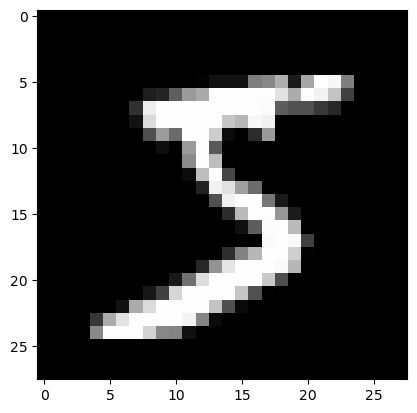

In [6]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [14]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
print("X_trainshape",x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_trainshape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [10]:
x_train=x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')

In [12]:
x_test = x_test.astype('float32')
x_train/=255
x_test/= 255

In [14]:
num_classes = 10
y_train=np.eye(num_classes)[y_train] 
y_test = np.eye(num_classes)[y_test]

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Input(shape=(784,)))  # <-- Add this first
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)


In [18]:
batch_size=128
epochs = 20
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8583 - loss: 0.4529 - val_accuracy: 0.9667 - val_loss: 0.1063
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9656 - loss: 0.1092 - val_accuracy: 0.9708 - val_loss: 0.0930
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9759 - loss: 0.0759 - val_accuracy: 0.9792 - val_loss: 0.0716
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9828 - loss: 0.0576 - val_accuracy: 0.9772 - val_loss: 0.0733
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9855 - loss: 0.0457 - val_accuracy: 0.9808 - val_loss: 0.0701
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9873 - loss: 0.0391 - val_accuracy: 0.9816 - val_loss: 0.0659
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9890 - loss: 0.0318 - val_accuracy: 0.9803 - val_loss: 0.0743
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9910 - loss: 0.0276 - val_accuracy: 0.

In [20]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08705445379018784
Test accuracy: 0.9843000173568726
